## Practicing_Airport dataset

In [1]:
import networkx as nx 

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import importlib
from itertools import islice #This for slice the number of iterations in the loop

In [ ]:
import PathGraphCreator as pgc
importlib.reload(pgc)

In [4]:
%matplotlib inline

In [5]:
Airport_Codes = pd.read_csv('./Data/US_Airport_Code.txt', header=None, sep=' ')
Airport_Loc = pd.read_csv('./Data/US_Airport_Loc.txt', sep = ' ')

In [6]:
Airport_Codes.columns = ['From', 'To', 'Passenger_Count']

In [7]:
Airport_Codes.head()

,From,To,Passenger_Count
0,29,78,95
1,29,114,37483
2,29,117,47
3,29,134,16
4,29,169,40


In [8]:
#Here the graph is undirected (this according to the documentation) is mainly due to equal weighting for to and fro passengers (symmetric)// This seems directed

A = nx.DiGraph()

for k in range(0,Airport_Codes.shape[0],1):
    A.add_edge(int(Airport_Codes['From'][k]),int(Airport_Codes['To'][k]))


In [9]:
# This is for defining the dictionary for additional attributes to the graph
A.code = {}
A.pos = {}

for j in range(0,Airport_Loc.shape[0],1):
    node = Airport_Loc['id'][j]
    A.code[node] = Airport_Loc['code'][j]
    A.pos[node] = (float(Airport_Loc['lon'][j]), float(Airport_Loc['lat'][j]))

In [10]:
nx.number_strongly_connected_components(A)

5

### Exploring Clustering and Connectedness

In [73]:
#Degree distribution // Could use less objects
deg = pd.DataFrame(nx.degree(A))
InD = pd.DataFrame(A.in_degree(nx.nodes(A)))
OutD = pd.DataFrame(A.out_degree(nx.nodes(A)))

In [76]:
OutD.head()

,0,1
0,29,49
1,78,9
2,114,164
3,117,43
4,134,28


In [113]:
DegreeDf = deg.merge(InD, on = 0)
DegreeDf = DegreeDf.merge(OutD, on = 0)
DegreeDf.columns = ['Node','Total Degree','In Degree','Out Degree']
DegreeDf.head()

,Node,Total Degree,In Degree,Out Degree
0,29,112,63,49
1,78,19,10,9
2,114,321,157,164
3,117,96,53,43
4,134,64,36,28


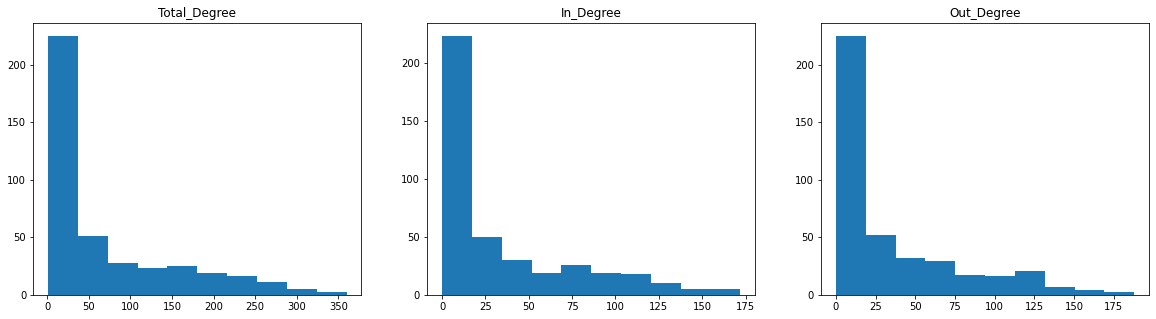

In [105]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,5))

ax1.set_title('Total_Degree')
ax1.hist(DegreeDf['Total Degree'])

ax2.set_title('In_Degree')
ax2.hist(DegreeDf['In Degree'])

ax3.set_title('Out_Degree')
ax3.hist(DegreeDf['Out Degree'])

#plt.hist(OutD_c)
plt.show()

In [114]:
DegreeDf.head()
InD_F = DegreeDf.groupby('In Degree').count()
InD_F = InD_F.drop(['Total Degree','Out Degree'], axis = 1)
InD_F.columns = ['Node Count']
InD_F['FreqR'] = InD_F['Node Count']/(DegreeDf.shape[0])
InD_F.head()

,Node Count,FreqR
In Degree,,
0,1,0.002469
1,25,0.061728
2,39,0.096296
3,31,0.076543
4,28,0.069136


In [117]:
DegreeDf.head()
OutD_F = DegreeDf.groupby('Out Degree').count()
OutD_F = OutD_F.drop(['Total Degree','In Degree'], axis = 1)
OutD_F.columns = ['Node Count']
OutD_F['FreqR'] = OutD_F['Node Count']/(DegreeDf.shape[0])
OutD_F.head()

,Node Count,FreqR
Out Degree,,
0,3,0.007407
1,24,0.059259
2,40,0.098765
3,40,0.098765
4,31,0.076543


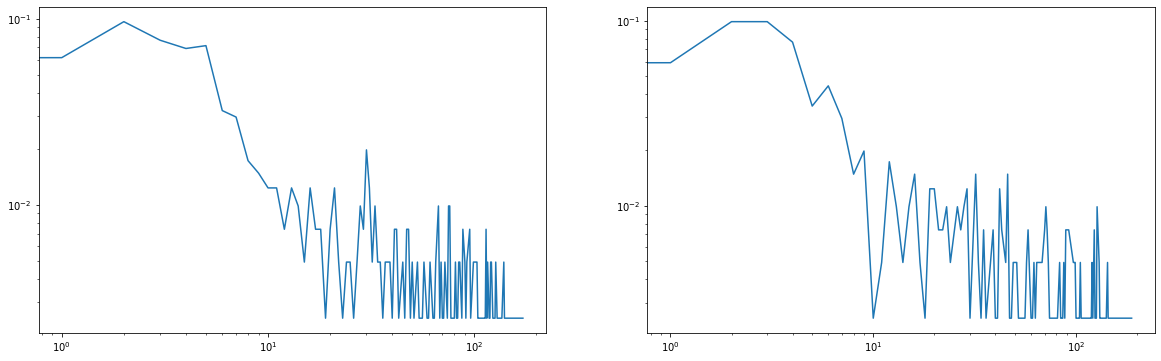

In [129]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (20,6))

ax1.plot(InD_F.index,InD_F['FreqR'])
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.plot(OutD_F.index,OutD_F['FreqR'])
ax2.set_xscale('log')
ax2.set_yscale('log')

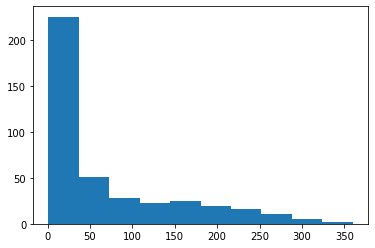

In [17]:
#Log-Log Plot

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,5))


plt.plot(InD_F.index,InD_F['FreqR'])
plt.yscale('log')
plt.xscale('log')

In [18]:
#There could be if else case statement, also the print could be better
for i in range(0,len(deg_c),1):
    if (deg[i][1] == max(deg_c)):
        d = deg[i][0]

    if (InD[i][1] == max(InD_c)):
        j = InD[i][0]

    if (OutD[i][1] == max(OutD_c)):
        o = OutD[i][0]


print('Airport with max connections-',max(deg_c),'\n',Airport_Loc[Airport_Loc['id'] == d],'\n')
print('Airport with max in-connections-',max(InD_c),'\n',Airport_Loc[Airport_Loc['id'] == j],'\n')
print('Airport with max out-connections-', max(OutD_c),'\n', Airport_Loc[Airport_Loc['id'] == o],'\n')

Airport with max connections- 360.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 

Airport with max in-connections- 172.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 

Airport with max out-connections- 188.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 



In [19]:
#To Do >> Log Log plot

In [20]:
#Lets calculate centrality measurese, this is a directed graph
Components_airports = list(nx.strongly_connected_components(A))

In [21]:
#Degrees here are not very clear in this directed graph

SubGraph_Len = []

#for k in Components_airports:
    
   # print(len(A.subgraph(k).in()))
    
    #print(len(nx.subgraph(k).nodes()))
  #  SubGraph_Len = np.append(SubGraph_Len, len(k))
#This would give length of subgraph, which would essentially be the number of nodes.
    

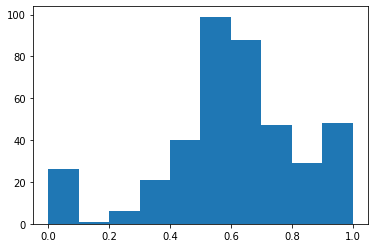

In [22]:
plt.hist(ClusteringCoeffs.values())
plt.show()

#This shows for most there are more that half of the possible directed edges in the neighbours, ie it is interconnected.

In [23]:
#Just considering connections and not the number of passengers (Weight)
nx.average_clustering(A)

0.6097876398260947

In [24]:
#Degree distribution // Could use less objects
deg = np.array(nx.degree(A))
InD = np.array(A.in_degree(nx.nodes(A)))
OutD = np.array(A.out_degree(nx.nodes(A)))

deg_c = []
InD_c = []
OutD_c = []

for i in range(0,len(deg),1):
    deg_c = np.append(deg_c,deg[i][1])
    InD_c = np.append(InD_c,InD[i][1])
    OutD_c = np.append(OutD_c,OutD[i][1])

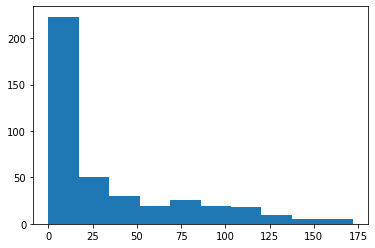

In [25]:
plt.hist(InD_c)
plt.show()

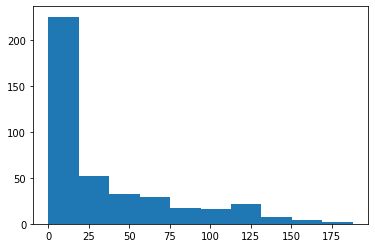

In [26]:
plt.hist(OutD_c)
plt.show()

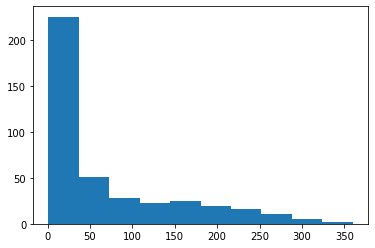

In [27]:
plt.hist(deg_c)
plt.show()

In [28]:
#There could be if else case statement, also the print could be better
for i in range(0,len(deg_c),1):
    if (deg[i][1] == max(deg_c)):
        d = deg[i][0]

    if (InD[i][1] == max(InD_c)):
        j = InD[i][0]

    if (OutD[i][1] == max(OutD_c)):
        o = OutD[i][0]


print('Airport with max connections-',max(deg_c),'\n',Airport_Loc[Airport_Loc['id'] == d],'\n')
print('Airport with max in-connections-',max(InD_c),'\n',Airport_Loc[Airport_Loc['id'] == j],'\n')
print('Airport with max out-connections-', max(OutD_c),'\n', Airport_Loc[Airport_Loc['id'] == o],'\n')

Airport with max connections- 360.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 

Airport with max in-connections- 172.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 

Airport with max out-connections- 188.0 
       id code    city        lat         lon
104  389  DEN  Denver  39.765278 -104.879444 



In [29]:
#To Do >> Log Log plot

In [30]:
#Lets calculate centrality measurese, this is a directed graph
Components_airports = list(nx.strongly_connected_components(A))

In [31]:
#Degrees here are not very clear in this directed graph

SubGraph_Len = []

#for k in Components_airports:
    
   # print(len(A.subgraph(k).in()))
    
    #print(len(nx.subgraph(k).nodes()))
  #  SubGraph_Len = np.append(SubGraph_Len, len(k))
#This would give length of subgraph, which would essentially be the number of nodes.
    

### Paths

In [32]:
Source = 1437 #San Fransisco
Target = 500  #New York

In [33]:
# Possible paths
#Path_List = nx.all_simple_paths(A,29,30)
#Path_List_R = nx.all_simple_paths(A,1437,500) #As this is directed graph

In [34]:
Path_Graph = nx.DiGraph()
Path_Graph_R = nx.DiGraph()
Path_Graph_Shortest = nx.DiGraph()

In [35]:
def k_shortest_paths(G, source, target,k):
    return list(islice(nx.shortest_simple_paths(G, source, target), k))

In [36]:
#Calculating all the paths is intense, mainly due to connectedness
Paths = k_shortest_paths(A,Source,Target,20)
Paths_R = k_shortest_paths(A,Target,Source,20)
Shortest_Path = nx.shortest_path(A, Source, Target)

In [37]:
Path_Graph = pgc.CreateGraph(Paths, Airport_Loc)
Path_Graph_R = pgc.CreateGraph(Paths_R, Airport_Loc)
Path_Graph_Shortest = pgc.CreateGraph(Shortest_Path, Airport_Loc)

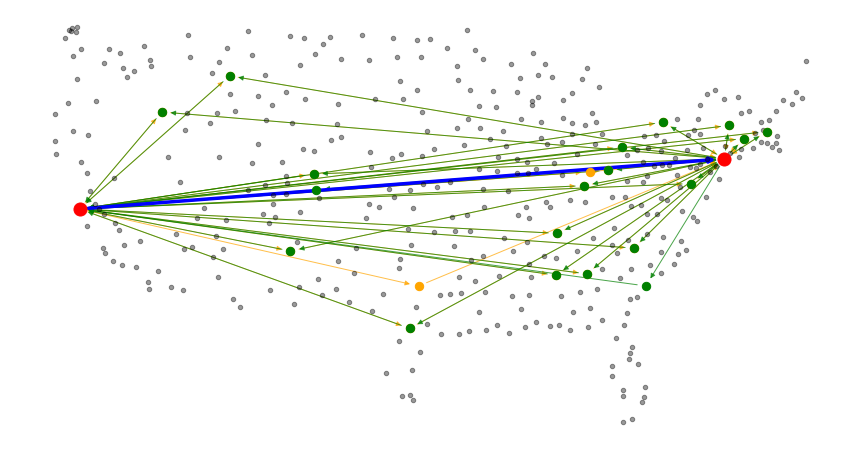

In [46]:
fig = plt.figure(figsize=(15,8))

nx.draw_networkx_nodes(A, pos = A.pos, node_size=20, node_color='#000000', alpha=0.4)
#nx.draw_networkx_labels(A,pos=A.pos,labels=A.code)

nx.draw_networkx_nodes(Path_Graph, pos = Path_Graph.pos, node_size=70, node_color='Orange')
nx.draw_networkx_edges(Path_Graph,pos = Path_Graph.pos, edge_color='Orange', alpha= 0.7)

nx.draw_networkx_nodes(Path_Graph_R, pos = Path_Graph_R.pos, node_size=70, node_color='Green')
nx.draw_networkx_edges(Path_Graph_R,pos = Path_Graph_R.pos, edge_color='Green', alpha= 0.7)

nx.draw_networkx_nodes(Path_Graph_Shortest, pos = Path_Graph_Shortest.pos, node_size=170, node_color='Red')
nx.draw_networkx_edges(Path_Graph_Shortest,pos = Path_Graph_Shortest.pos, edge_color='Blue', width=3.5)
#nx.draw_networkx_labels(Path_Graph_Shortest,pos = Path_Graph_Shortest.pos, labels= Path_Graph_Shortest.label, font_color='Black', font_weight='bold', font_size = 18)

plt.axis('off')
plt.show()